In [1]:
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn as sns#Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas as pd
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

## Social Factor Analysis - Billboard VS LGBTQ

In [5]:
import ast
generic = lambda x:ast.literal_eval(x)
conv = {'tokens': generic,
        'normalized': generic}

In [6]:
lgbtq_df = pd.read_csv('lgbt_words.csv')
lgbtq_words = lgbtq_df['0'].values

In [7]:
billboard_df = pd.read_csv("cleaned_billboard.csv")
billboard_df

,Rank,Song,Artist,Year,Lyrics,normalized
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,"['sam', 'sham', 'miscellaneous', 'wooly', 'bul..."
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,"['sugar', 'pie', 'honey', 'bunch', 'know', 'lo..."
2,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,"['wake', 'morning', 'mind', 'mind', 'get', 'tr..."
3,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,"['close', 'eye', 'anymore', 'kiss', 'lip', 's'..."
4,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,"['life', 'make', 'lonely', 'downtown', 'have',..."
...,...,...,...,...,...,...
4822,95,waves,mr probz,2015,my face above the water my feet cant touch th...,"['face', 'water', 'foot', 'not', 'touch', 'gri..."
4823,96,el perdon,nicky jam and enrique iglesias,2015,enrique iglesias dime si es verdad me dijeron ...,"['enrique', 'iglesias', 'dime', 'si', 'es', 'v..."
4824,98,night changes,one direction,2015,going out tonight changes into something red ...,"['go', 'tonight', 'change', 'red', 'mother', '..."
4825,99,back to back,drake,2015,oh man oh man oh man not againyeah i learned ...,"['oh', 'man', 'oh', 'man', 'oh', 'man', 'again..."


In [13]:
from sklearn.feature_extraction import stop_words
my_stop_words = list(stop_words.ENGLISH_STOP_WORDS)
my_stop_words += [str(i) for i in range(10)]
my_stop_words += ['intro','verse','pre','post','lift','chorus','bridge',
                  'outro','instrumental','\[','\]',':',';','\\']
my_stop_words

['cant',
 'anyway',
 'should',
 'top',
 'anywhere',
 'full',
 'de',
 'itself',
 'afterwards',
 'sometimes',
 'amoungst',
 'yourself',
 'and',
 'few',
 'are',
 'take',
 'twenty',
 'below',
 'nothing',
 'even',
 'hers',
 'onto',
 'together',
 'name',
 'most',
 'me',
 'further',
 'hereafter',
 'very',
 'nor',
 'two',
 'so',
 'serious',
 'up',
 'formerly',
 'former',
 'whatever',
 'etc',
 'several',
 'call',
 'never',
 'sincere',
 'someone',
 'fill',
 'often',
 'hence',
 'will',
 'between',
 'ours',
 'get',
 'fifteen',
 'elsewhere',
 'third',
 'eleven',
 'indeed',
 'side',
 'meanwhile',
 'too',
 'however',
 'whereas',
 'had',
 'whereby',
 'seemed',
 'although',
 'wherein',
 'an',
 'show',
 'bill',
 'twelve',
 'may',
 'now',
 'throughout',
 'how',
 'eg',
 'whenever',
 'done',
 'cry',
 'myself',
 'anyhow',
 'thereafter',
 'each',
 'i',
 'though',
 'whom',
 'besides',
 'her',
 'until',
 'were',
 'yet',
 'ie',
 'somewhere',
 'well',
 'seem',
 'with',
 'own',
 'thereupon',
 'was',
 'couldnt',
 

In [135]:
love_word = ['love', 'darling', 'sweetheart', 'honey', 'marry']
sex_word = ['sex','body','sexy','pussy','dick']

### word frequency analysis

In [16]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(min_df=10, stop_words=my_stop_words, norm='l2')#max_df=0.8, min_df=20,
billboard_vects = TFVectorizer.fit_transform(billboard_df['Lyrics'])
billboard_vects.shape

(4827, 3552)

In [18]:
vocab = TFVectorizer.vocabulary_.keys()

In [127]:
'lover' in vocab

True

In [136]:
love_index = [TFVectorizer.vocabulary_[w] for w in love_word]
love_index = sorted(love_index)

In [119]:
sex_index = [TFVectorizer.vocabulary_[w] for w in sex_word]
sex_index = sorted(sex_index)

In [137]:
love_vects = billboard_vects[:,love_index]
love_vects.todense().shape

(4827, 5)

In [120]:
sex_vects = billboard_vects[:,sex_index]
sex_vects.todense().shape

(4827, 5)

In [138]:
billboard_df['love_vects'] = list(love_vects.toarray())
billboard_df['sex_vects'] = list(sex_vects.toarray())

In [140]:
year_groups = list(billboard_df.groupby(['Year']))

In [141]:
love_year_mean = []
for y, df in year_groups:
    love_vec = df['love_vects'].mean()
    love_year_mean.append((y,love_vec))
love_year_mean

[(1965, array([0.01011811, 0.00840413, 0.07140547, 0.        , 0.        ])),
 (1966, array([0.00476084, 0.0009091 , 0.04592357, 0.00647316, 0.        ])),
 (1967, array([0.00863772, 0.00433526, 0.08651483, 0.00231192, 0.0010824 ])),
 (1968, array([0.01107443, 0.01004673, 0.06094784, 0.        , 0.        ])),
 (1969, array([0.00968947, 0.0147481 , 0.07332095, 0.0073468 , 0.        ])),
 (1970, array([0.00904122, 0.00449591, 0.05802401, 0.        , 0.00260631])),
 (1971, array([0.00456274, 0.00245231, 0.05728784, 0.00616834, 0.        ])),
 (1972, array([0.00586015, 0.00315241, 0.07275844, 0.        , 0.        ])),
 (1973, array([0.01053179, 0.00714984, 0.04424158, 0.00328802, 0.        ])),
 (1974, array([0.00185744, 0.00134398, 0.06702543, 0.        , 0.        ])),
 (1975, array([0.00132868, 0.00757804, 0.05870482, 0.00182304, 0.        ])),
 (1976, array([0.00680559, 0.00944736, 0.08178745, 0.        , 0.        ])),
 (1977, array([0.01157172, 0.00366977, 0.0832832 , 0.        , 0

In [123]:
sex_year_mean = []
for y, df in year_groups:
    sex_vec = df['sex_vects'].mean()
    sex_year_mean.append((y,sex_vec))
sex_year_mean

[(1965, array([0.0021033, 0.       , 0.       , 0.       , 0.       ])),
 (1966, array([0., 0., 0., 0., 0.])),
 (1967, array([0., 0., 0., 0., 0.])),
 (1968, array([0., 0., 0., 0., 0.])),
 (1969, array([0.0004835, 0.       , 0.       , 0.       , 0.       ])),
 (1970, array([0., 0., 0., 0., 0.])),
 (1971, array([0.00061755, 0.00189636, 0.        , 0.00177125, 0.00167098])),
 (1972, array([0.00079422, 0.        , 0.        , 0.        , 0.        ])),
 (1973, array([0.00034551, 0.        , 0.        , 0.        , 0.00062811])),
 (1974, array([0.00034456, 0.        , 0.        , 0.        , 0.00113765])),
 (1975, array([0.00058094, 0.        , 0.00099294, 0.        , 0.        ])),
 (1976, array([0.00122336, 0.        , 0.        , 0.        , 0.00908625])),
 (1977, array([0.00325601, 0.        , 0.        , 0.        , 0.        ])),
 (1978, array([0.00448211, 0.        , 0.        , 0.        , 0.        ])),
 (1979, array([0.00321265, 0.        , 0.        , 0.        , 0.00178489])),


In [46]:
import requests
from bs4 import BeautifulSoup #called `beautifulsoup4`, an html parser
import re #for regexs
wiki_page = BeautifulSoup(requests.get("https://en.wikipedia.org/wiki/Timeline_of_LGBT_history_in_the_United_States#1960s").text)
wiki_years = wiki_page.body.findAll('h4')
wiki_years = [int(i.text.strip('[edit]')) for i in wiki_years]
wiki_years = [y for y in wiki_years if y>=1965 and y<=2015]
wiki_years

[1965,
 1966,
 1967,
 1969,
 1973,
 1976,
 1978,
 1979,
 1980,
 1983,
 1986,
 1987,
 1989,
 1993,
 1994,
 1996,
 1998,
 1999,
 2000,
 2002,
 2003,
 2008,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2015]

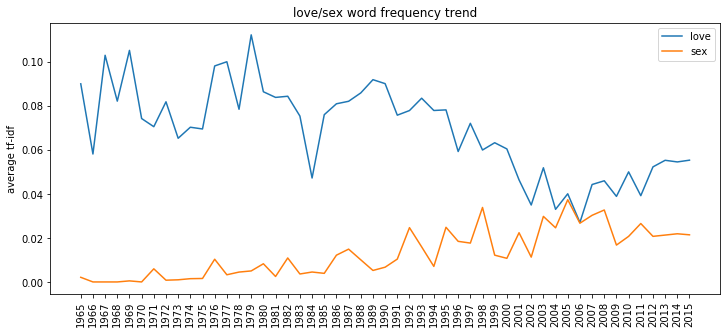

In [165]:
plt.rcParams['figure.figsize'] = [12,5]
plt.plot([x[0] for x in love_year_mean],[x[1].sum() for x in love_year_mean], label='love')
plt.plot([x[0] for x in sex_year_mean],[x[1].sum() for x in sex_year_mean],label='sex')
plt.ylabel('average tf-idf')
plt.title('love/sex word frequency trend')
plt.legend()
plt.xticks([x[0] for x in love_year_mean],rotation=90)
plt.savefig('Pictures/love_and_sex_word_trend')
plt.show()

In [170]:
from scipy.stats import pearsonr,linregress
pearsonr([x[0] for x in love_year_mean],[x[1].sum() for x in love_year_mean])

(-0.7058090499278439, 7.2685240300128085e-09)

In [167]:
pearsonr([x[0] for x in sex_year_mean],[x[1].sum() for x in sex_year_mean])

(0.8312279527761381, 4.3373617933295355e-14)

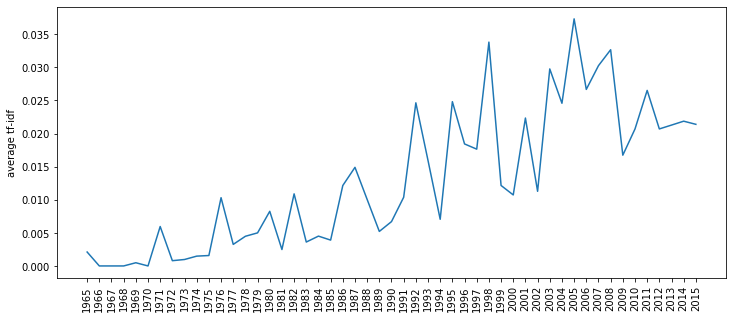

In [159]:
plt.rcParams['figure.figsize'] = [12,5]
plt.plot([x[0] for x in sex_year_mean],[x[1].sum() for x in sex_year_mean])
#for y, array in lgbt_year_sum:
#    if y in wiki_years:
#        plt.annotate(str(y),(y,array.sum()))
plt.ylabel('average tf-idf')
plt.xticks([x[0] for x in sex_year_mean],rotation=90)
plt.savefig('Pictures/sex_related')
plt.show()

In [38]:
from scipy.stats import linregress as reg
reg([x[0] for x in lgbt_year_sum], [x[1].sum() for x in lgbt_year_sum])

LinregressResult(slope=0.0001081518083598804, intercept=2.141620017616654, rvalue=0.003391994326464036, pvalue=0.9811531643378173, stderr=0.0045548924813600174)

In [63]:
ind2word = {y:x for x,y in TFVectorizer.vocabulary_.items()}
ind2word

{2541: 'sam',
 1947: 'miscellaneous',
 837: 'dos',
 3143: 'told',
 3087: 'thing',
 2555: 'saw',
 220: 'big',
 1460: 'horns',
 1554: 'jaw',
 1711: 'lets',
 832: 'dont',
 461: 'chance',
 572: 'come',
 1692: 'learn',
 697: 'dance',
 3077: 'thats',
 2402: 'really',
 2330: 'pull',
 1712: 'letter',
 2077: 'number',
 1144: 'form',
 2506: 'rough',
 2857: 'square',
 1819: 'lyrics',
 1866: 'mean',
 2960: 'sugar',
 2217: 'pie',
 1444: 'honey',
 370: 'bunch',
 1642: 'know',
 1794: 'love',
 1386: 'help',
 1723: 'life',
 1699: 'leaving',
 1594: 'just',
 2215: 'picture',
 1626: 'kissed',
 3099: 'thousand',
 2777: 'snap',
 1075: 'finger',
 3415: 'wink',
 985: 'eye',
 1502: 'im',
 3118: 'tied',
 2935: 'strings',
 3081: 'theres',
 1843: 'man',
 1125: 'fool',
 3056: 'tell',
 1544: 'ive',
 3195: 'tried',
 3123: 'time',
 991: 'face',
 510: 'choked',
 1215: 'girl',
 2879: 'starts',
 1088: 'flame',
 375: 'burning',
 1364: 'heart',
 3047: 'tearing',
 73: 'apart',
 1859: 'matter',
 3215: 'try',
 3350: 'weak',


In [58]:
lgbt_word_trends = []
for i in range(15):
    word = ind2word[lgbt_index[i]]
    result = reg([x[0] for x in lgbt_year_sum], [x[1][i] for x in lgbt_year_sum])
    lgbt_word_trends.append((i,word,result))
sorted(lgbt_word_trends,key=lambda x:x[2][3])

[(12,
  'sex',
  LinregressResult(slope=0.006415388237071142, intercept=-12.62955058994463, rvalue=0.545206919359744, pvalue=3.518892659118394e-05, stderr=0.001409171304692825)),
 (1,
  'bi',
  LinregressResult(slope=0.0007620582206132249, intercept=-1.5079361888871643, rvalue=0.43081780590164037, pvalue=0.0016000001398334043, stderr=0.0002280417097727977)),
 (4,
  'come',
  LinregressResult(slope=-0.010580780665707995, intercept=22.696000592798843, rvalue=-0.3385468027304236, pvalue=0.015098749149395987, stderr=0.004201141367207168)),
 (9,
  'king',
  LinregressResult(slope=0.0015435838913916034, intercept=-2.971207475337776, rvalue=0.19892897149008834, pvalue=0.16167835647976447, stderr=0.0010863415748595185)),
 (11,
  'rainbow',
  LinregressResult(slope=-0.0007157381259977306, intercept=1.4546523415176813, rvalue=-0.1929844003171655, pvalue=0.17484114669908357, stderr=0.0005198670049736686)),
 (3,
  'closet',
  LinregressResult(slope=0.0007116563653483344, intercept=-1.3946227674858

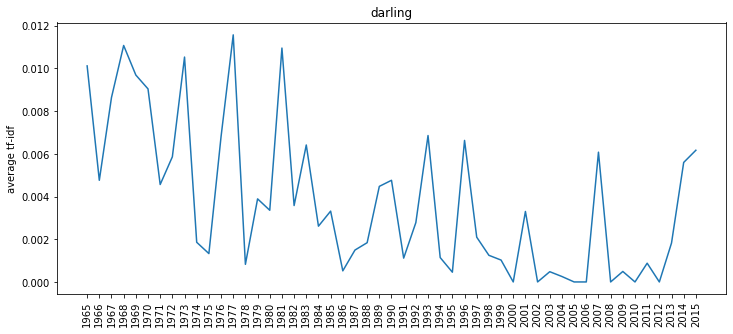

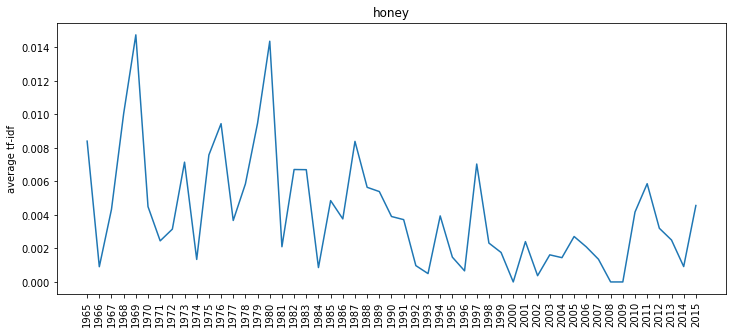

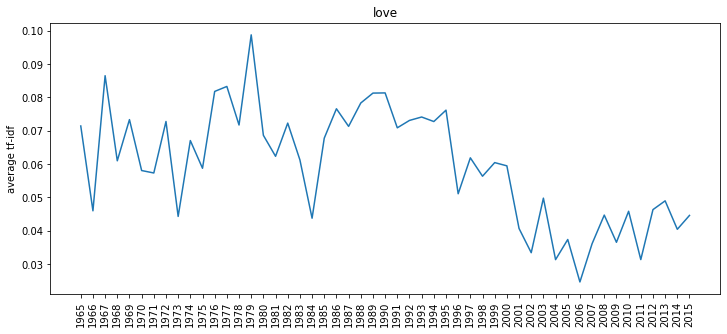

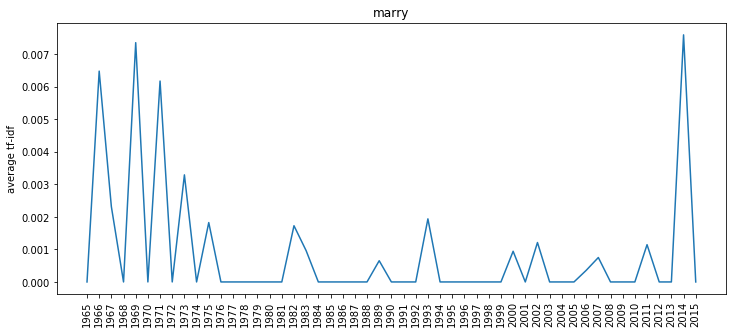

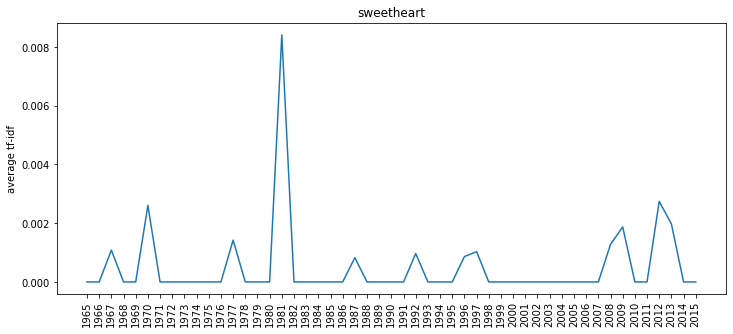

In [162]:
for i in range(5):
    plt.plot([x[0] for x in love_year_mean],[x[1][i] for x in love_year_mean])
    plt.xticks([x[0] for x in love_year_mean],rotation=90)
    plt.ylabel('average tf-idf')
    plt.title(ind2word[love_index[i]])
    plt.savefig('Pictures/LGBT-{}-word frequency.png'.format(ind2word[love_index[i]]))
    plt.show()

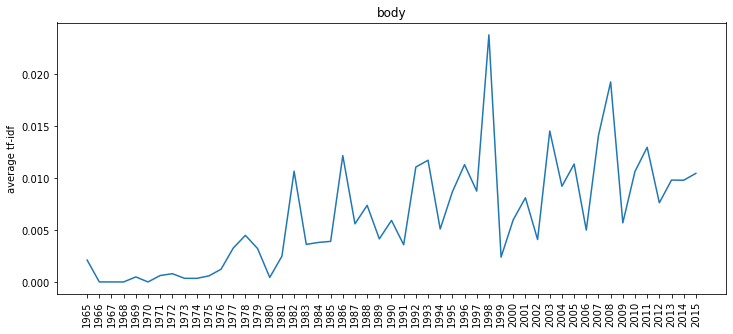

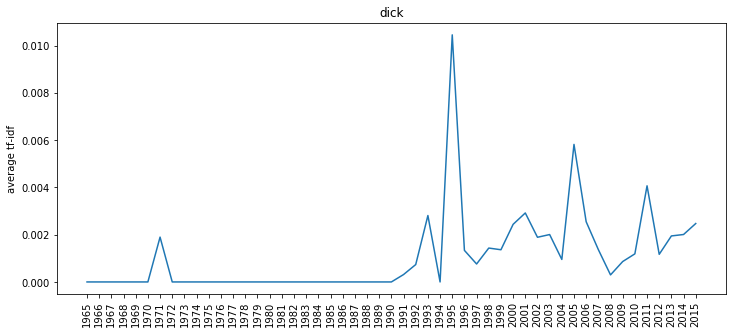

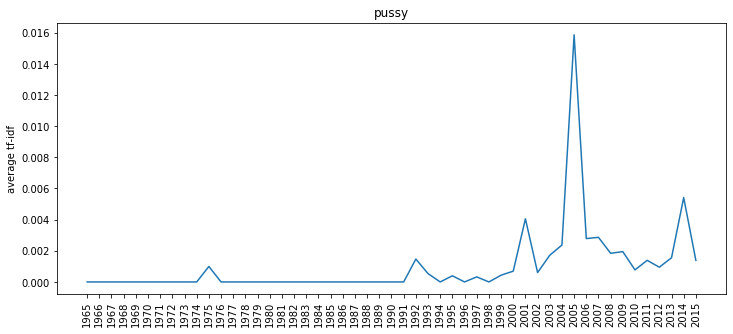

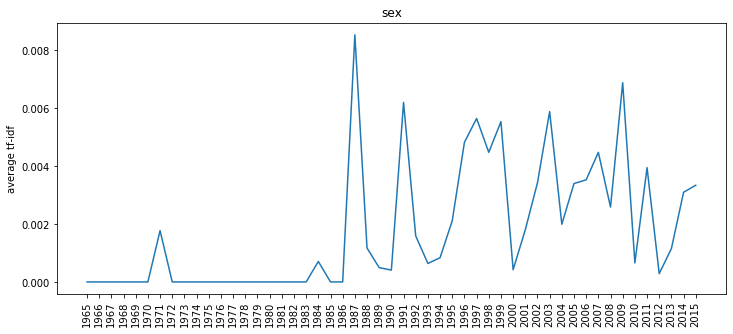

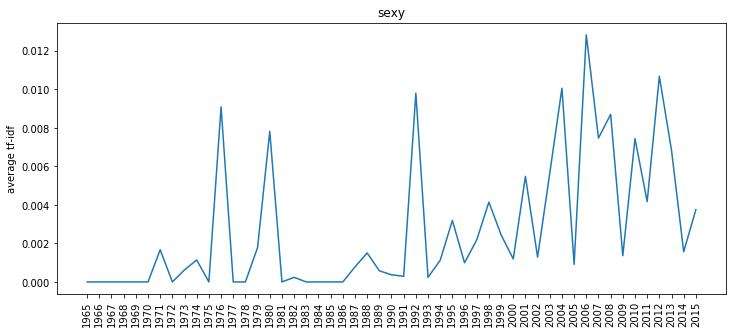

In [163]:
for i in range(5):
    plt.plot([x[0] for x in sex_year_mean],[x[1][i] for x in sex_year_mean])
    plt.xticks([x[0] for x in sex_year_mean],rotation=90)
    plt.ylabel('average tf-idf')
    plt.title(ind2word[sex_index[i]])
    plt.savefig('Pictures/LGBT-{}-word frequency.png'.format(ind2word[sex_index[i]]))
    plt.show()

### Dynamic Topic Modeling

In [6]:
from multiprocessing import Pool
p = Pool()
billboard_df['normalized'] = p.map(ast.literal_eval, billboard_df['normalized']) 

In [7]:
import gensim
billboard_dictionary = gensim.corpora.Dictionary(billboard_df['normalized'])

In [8]:
billboard_corpus = [billboard_dictionary.doc2bow(text) for text in billboard_df['normalized']]

In [32]:
time_stamps = [1960,1970,1980,1990,2000,2010,2020]
docs_time = [len(billboard_df.loc[(billboard_df['Year']>time_stamps[i])&\
            (billboard_df['Year']<=time_stamps[i+1])]) for i in range(len(time_stamps)-1)]
docs_time

[551, 909, 956, 947, 973, 491]

In [33]:
from gensim.models import ldaseqmodel
ldaseq_5 = ldaseqmodel.LdaSeqModel(corpus=billboard_corpus, 
                                   id2word=billboard_dictionary, 
                                   time_slice=docs_time, 
                                   num_topics=5)

/home/cytwill/.local/lib/python3.7/site-packages/gensim/models/ldaseqmodel.py:293: RuntimeWarning: divide by zero encountered in double_scalars
  convergence = np.fabs((bound - old_bound) / old_bound)


In [34]:
ldaseq_5.save("ldaseqmodel_5")

In [38]:
ldaseq_7.print_topics(time=9)

[[('not', 0.09108060164505942),
  ('have', 0.03281676932483788),
  ('be', 0.025578994890391893),
  ('get', 0.016796288080606993),
  ('shake', 0.016057973026362825),
  ('know', 0.014366489622518536),
  ('uh', 0.013342877219347843),
  ('wo', 0.011407546880210695),
  ('think', 0.010374715799183079),
  ('tell', 0.009922476364426688),
  ('money', 0.009281131924777773),
  ('hard', 0.008702684840257421),
  ('life', 0.00868279766689085),
  ('stop', 0.008521128991282136),
  ('try', 0.008350722628685116),
  ('bout', 0.008271793223380054),
  ('want', 0.007804426111801938),
  ('man', 0.007219785661309196),
  ('like', 0.007065877658078261),
  ('say', 0.00700832822714547)],
 [('oh', 0.13458176361687518),
  ('na', 0.08702292199738373),
  ('gon', 0.06026825190627336),
  ('be', 0.021398492510567847),
  ('like', 0.017583867610860268),
  ('whoa', 0.015300157711203985),
  ('night', 0.014641441853358602),
  ('get', 0.01240106600029855),
  ('s', 0.010967660292356438),
  ('not', 0.010831906660158394),
  ('co

In [174]:
from gensim.models import ldaseqmodel
ldaseq_5 = ldaseqmodel.LdaSeqModel.load('ldaseqmodel_5')
ldaseq_7 = ldaseqmodel.LdaSeqModel.load('ldaseqmodel_7')

In [196]:
ldaseq_5.print_topic_times(topic = 0)

[[('da', 0.03145701507295299),
  ('boogie', 0.023283583127973666),
  ('you', 0.01828608105827441),
  ('like', 0.009676074200228094),
  ('beat', 0.009145486696877125),
  ('yo', 0.007634002909039426),
  ('get', 0.006910315339855698),
  ('y', 0.00687874301899344),
  ('de', 0.0065119935240580155),
  ('ba', 0.0064030180787972854),
  ('wit', 0.0060851056277452485),
  ('dat', 0.006070101417800616),
  ('funk', 0.006003371090124907),
  ('turn', 0.005551623812787864),
  ('want', 0.005311931309346287),
  ('know', 0.005113248094142467),
  ('hey', 0.005013965289687588),
  ('pop', 0.004971795878966837),
  ('pump', 0.004544377987441234),
  ('let', 0.004363253385212506)],
 [('da', 0.031002083276843367),
  ('boogie', 0.02035424197379353),
  ('you', 0.01836018570767512),
  ('like', 0.009882241781663255),
  ('beat', 0.008695148399057731),
  ('yo', 0.007819296564736832),
  ('y', 0.007047437929764948),
  ('get', 0.006965808902772984),
  ('wit', 0.006288103673450094),
  ('ba', 0.006284488308319085),
  ('de'

In [205]:
love_topics = []
sex_topics = []
for i in range(7):
    for t in range(10):
        topic = dict(ldaseq_7.print_topic_times(topic=i)[t])
        topic_words = set(topic.keys())
        if topic_words & set(love_word):
            love_topics.append((i,t))
        if topic_words & set(sex_word):
            sex_topics.append((i,t))

In [206]:
love_topics

[(2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9)]

In [208]:
ldaseq_7.print_topic_times(topic=3)

[[('let', 0.06907135217931336),
  ('good', 0.053901745762899),
  ('rock', 0.028781403460657214),
  ('you', 0.01997941166280239),
  ('sing', 0.018684096452211328),
  ('roll', 0.01824877319049531),
  ('bop', 0.015024656338276089),
  ('doo', 0.013075710709591288),
  ('come', 0.011981993545143729),
  ('boy', 0.011839080449145074),
  ('wild', 0.011097255678860652),
  ('get', 0.010647711618800345),
  ('bad', 0.009953248198943257),
  ('like', 0.009256183823204166),
  ('dit', 0.007614649248696051),
  ('funk', 0.007304902175316275),
  ('fly', 0.007226795071730906),
  ('time', 0.006649068101961708),
  ('ring', 0.005584621413496213),
  ('go', 0.0054639100177448306)],
 [('let', 0.062017611134082225),
  ('good', 0.05292710375501837),
  ('rock', 0.03516440560498124),
  ('you', 0.01962226475867407),
  ('roll', 0.018713354854328765),
  ('sing', 0.018208906524911292),
  ('doo', 0.013551175427301332),
  ('bop', 0.013539921607814887),
  ('boy', 0.01276602055088964),
  ('come', 0.011797720340884289),
  ('

In [210]:
ldaseq_7.print_topic_times(topic=2)

[[('love', 0.06445073940726227),
  ('not', 0.0306479782058302),
  ('have', 0.021433768974344666),
  ('know', 0.02120694718696853),
  ('time', 0.015644176365693388),
  ('be', 0.015303293427862784),
  ('s', 0.014631187404676253),
  ('get', 0.012192759602567478),
  ('oh', 0.011222061906297657),
  ('way', 0.01020859229158656),
  ('ill', 0.010107784560509108),
  ('girl', 0.009445037329061445),
  ('come', 0.009296450652717695),
  ('need', 0.009280163311425881),
  ('like', 0.009131701312874448),
  ('day', 0.009088778428529213),
  ('tell', 0.00900240826203856),
  ('go', 0.008274069155110393),
  ('heart', 0.007903572885051965),
  ('find', 0.007749345397072568)],
 [('love', 0.06771523274038739),
  ('not', 0.030372897111046442),
  ('know', 0.022313024593369563),
  ('have', 0.021789061567777327),
  ('be', 0.016427679932164645),
  ('time', 0.015296044877420352),
  ('s', 0.013715854239372032),
  ('get', 0.012197032183876567),
  ('like', 0.010438415790206485),
  ('way', 0.01035052290054575),
  ('oh',

### Marriage Data

In [238]:
woman_df = pd.read_csv('marriage-divorced rate-woman.csv')
woman_df = woman_df.sort_values(by='year', ignore_index = True, axis = 0)
woman_df

,year,married rate,divorce rate,total,married total,unmarried total,never married,widowed,divorced
0,1950,0.658068,0.024045,57102,37577,19525,11418,6734,1373
1,1960,0.659108,0.026437,64607,42583,22024,12252,8064,1708
2,1970,0.619139,0.034938,77766,48148,29618,17167,9734,2717
3,1980,0.589063,0.066352,89914,52965,36950,20226,10758,5966
4,1990,0.568892,0.088594,99838,56797,43040,22718,11477,8845
5,1993,0.564141,0.096514,102400,57768,44631,23534,11214,9883
6,1994,0.559299,0.097364,104032,58185,45847,24645,11073,10129
7,1995,0.561603,0.097783,105028,58984,46045,24693,11082,10270
8,1996,0.555545,0.099226,106031,58905,47127,25528,11078,10521
9,1997,0.549414,0.103814,107076,58829,48247,26073,11058,11116


In [239]:
man_df = pd.read_csv('marriage-divorced rate-man.csv')
man_df = man_df.sort_values(by='year', ignore_index = True, axis = 0)
man_df

,year,married rate,divorce rate,total,married total,unmarried total,never married,widowed,divorced
0,1950,0.675189,0.019615,54601,36866,17735,14400,2264,1071
1,1960,0.693196,0.018350,60273,41781,18492,15274,2112,1106
2,1970,0.667654,0.022208,70559,47109,23450,19832,2051,1567
3,1980,0.632275,0.047958,81947,51813,30134,24227,1977,3930
4,1990,0.607177,0.068327,91955,55833,36121,27505,2333,6283
5,1993,0.599163,0.071457,94854,56833,38021,28775,2468,6778
6,1994,0.589740,0.074921,96768,57068,39700,30228,2222,7250
7,1995,0.589229,0.075565,97704,57570,39953,30286,2284,7383
8,1996,0.584788,0.078789,98593,57656,40937,30691,2478,7768
9,1997,0.578310,0.082179,100159,57923,42236,31315,2690,8231


In [240]:
man_df[:1990]

,year,married rate,divorce rate,total,married total,unmarried total,never married,widowed,divorced
0,1950,0.675189,0.019615,54601,36866,17735,14400,2264,1071
1,1960,0.693196,0.018350,60273,41781,18492,15274,2112,1106
2,1970,0.667654,0.022208,70559,47109,23450,19832,2051,1567
3,1980,0.632275,0.047958,81947,51813,30134,24227,1977,3930
4,1990,0.607177,0.068327,91955,55833,36121,27505,2333,6283
5,1993,0.599163,0.071457,94854,56833,38021,28775,2468,6778
6,1994,0.589740,0.074921,96768,57068,39700,30228,2222,7250
7,1995,0.589229,0.075565,97704,57570,39953,30286,2284,7383
8,1996,0.584788,0.078789,98593,57656,40937,30691,2478,7768
9,1997,0.578310,0.082179,100159,57923,42236,31315,2690,8231


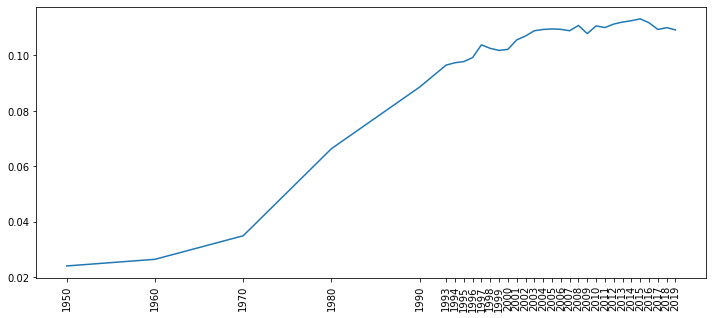

In [192]:
plt.plot(woman_df['year'].values,woman_df['divorce rate'].values)
#for y, array in lgbt_year_sum:
#    if y in wiki_years:
#        plt.annotate(str(y),(y,array.sum()))
plt.xticks(woman_df['year'].values,rotation=90)
#plt.savefig('Pictures/sex_related')
plt.show()

In [254]:
common_years = set(woman_df['year']) & set(range(1965,2016))
common_years

{1970,
 1980,
 1990,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015}

In [255]:
common_sexy_year_mean = [x for x in sex_year_mean if x[0] in common_years]
common_love_year_mean = [x for x in love_year_mean if x[0] in common_years]

In [256]:
common_man_df = man_df.loc[man_df['year'].isin(common_years)]
common_woman_df = woman_df.loc[woman_df['year'].isin(common_years)]

In [258]:
pearsonr([x[1].sum() for x in common_sexy_year_mean],common_man_df['married rate'])

(-0.6079776682426572, 0.0009849834673276215)

In [293]:
pearsonr([x[1].sum() for x in common_sexy_year_mean],common_woman_df['married rate'])

(-0.5964329992561963, 0.0013004232116909608)

In [294]:
pearsonr([x[1].sum() for x in common_love_year_mean],common_man_df['married rate'])

(0.6370213978707485, 0.00046612336804208854)

In [296]:
pearsonr([x[1].sum() for x in common_love_year_mean],common_woman_df['married rate'])

(0.6402225316965144, 0.0004272402857453097)

In [272]:
def my_normalize(array):
    return (np.array(array)-min(array))/(max(array)-min(array))

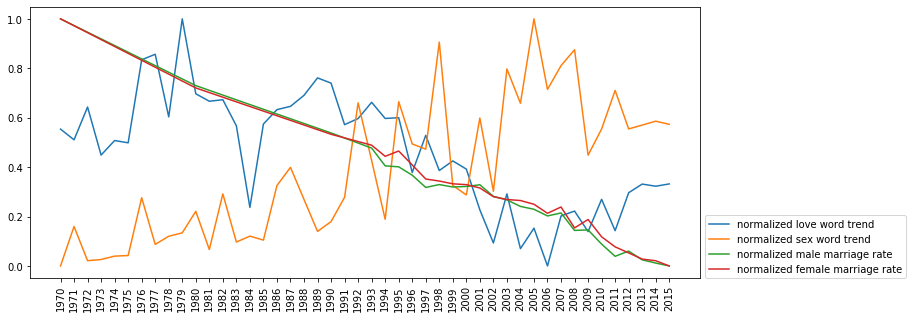

In [291]:
from sklearn.preprocessing import normalize
plt.plot(range(1970,2016),
         my_normalize([x[1].sum() for x in love_year_mean[5:]]),
         label = 'normalized love word trend')
plt.plot(range(1970,2016),
         my_normalize([x[1].sum() for x in sex_year_mean[5:]]),
         label = 'normalized sex word trend')
plt.plot(common_man_df['year'].values,
         my_normalize(common_man_df['married rate'].values), #/max(common_man_df['married rate']),
         label='normalized male marriage rate')
plt.plot(common_woman_df['year'].values,
         my_normalize(common_woman_df['married rate'].values), #/max(common_woman_df['married rate']),
         label='normalized female marriage rate')
plt.xticks(range(1970,2016),rotation=90)
plt.legend(bbox_to_anchor=(1, 0.25))
plt.savefig('Pictures/marriage & words',bbox_inches="tight")
plt.show()

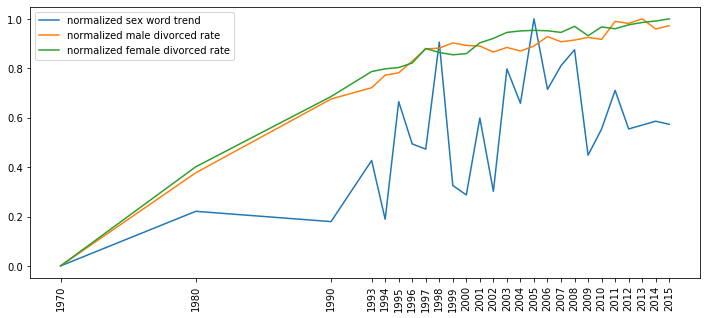

In [277]:
from sklearn.preprocessing import normalize
plt.plot([x[0] for x in common_love_year_mean],
         my_normalize([x[1].sum() for x in common_sexy_year_mean]),
         label = 'normalized sex word trend')
plt.plot(common_man_df['year'].values,
         my_normalize(common_man_df['divorce rate'].values), #/max(common_man_df['married rate']),
         label='normalized male divorced rate')
plt.plot(common_woman_df['year'].values,
         my_normalize(common_woman_df['divorce rate'].values), #/max(common_woman_df['married rate']),
         label='normalized female divorced rate')
plt.xticks([x[0] for x in common_sexy_year_mean],rotation=90)
plt.legend()
plt.savefig('Pictures/divorce & sex')
plt.show()